In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [23]:
df = pd.read_csv('OnlineArrestData1980-2018.csv')

#### The function below lets you input a county from the list of counties from the dataframe and retrieves the different arrest types as well as the grand total of arrests for each county. The function will tell you male and female arrests for each type as well. The function is specific to 2018 arrests.

In [4]:
def county_crime_totals(df, county):
    df = df.loc[df['COUNTY']==county]
    df = df.loc[df['YEAR']==2018]
    
    """the following is for the sum of crimes between the two genders"""
    violent_crimes = df.VIOLENT.sum()
    property_crimes = df.PROPERTY.sum()
    felony_drug_offenses = df.F_DRUGOFF.sum()
    f_sex = df.F_SEXOFF.sum()
    f_other = df.F_ALLOTHER.sum()
    misdemeanor = df.M_TOTAL.sum()
    status = df.S_TOTAL.sum()
    total_arrests = violent_crimes+property_crimes+felony_drug_offenses+f_sex+f_other+misdemeanor+status

    """crimes for males only"""
    crime_total_males = df[df.GENDER != 'Female']
    male_violent_crimes = crime_total_males.VIOLENT.sum()
    male_property_crimes = crime_total_males.PROPERTY.sum()
    male_felony_drug_offenses = crime_total_males.F_DRUGOFF.sum()
    male_f_sex = crime_total_males.F_SEXOFF.sum()
    male_f_other = crime_total_males.F_ALLOTHER.sum()
    male_misdemeanor = crime_total_males.M_TOTAL.sum()
    male_status = crime_total_males.S_TOTAL.sum()
    male_total_arrests = male_violent_crimes+male_property_crimes+male_felony_drug_offenses+male_f_sex+male_f_other+male_misdemeanor+male_status
    
    """crimes for females only"""
    crime_total_females = df[df.GENDER != 'Male']
    female_violent_crimes = crime_total_females.VIOLENT.sum()
    female_property_crimes = crime_total_females.PROPERTY.sum()
    female_felony_drug_offenses = crime_total_females.F_DRUGOFF.sum()
    female_f_sex = crime_total_females.F_SEXOFF.sum()
    female_f_other = crime_total_females.F_ALLOTHER.sum()
    female_misdemeanor = crime_total_females.M_TOTAL.sum()
    female_status = crime_total_females.S_TOTAL.sum()
    female_total_arrests = female_violent_crimes+female_property_crimes+female_felony_drug_offenses+female_f_sex+female_f_other+female_misdemeanor+female_status
    
    totals = (f'The total arrests in 2018 for violent_crimes in {county} county is: {violent_crimes}\n'
              f'The total arrests in 2018 for property crimes in {county} is {property_crimes}\n'
              f'The total arrests in 2018 for felony drug offenses in {county} is: {felony_drug_offenses}\n'
              f'The total arrests in 2018 for felony sex offenses in {county} is: {f_sex}\n'
              f'The total arrests in 2018 for other felony offenses in {county} is: {f_other}\n'
              f'The total arrests in 2018 for misdemeanors in {county} is: {misdemeanor}\n'
              f'The total arrests in 2018 for status violations in {county} is: {status}\n'
              f'The total number of arrests in {county} in 2018 was {total_arrests}')
    
    males = (f'The male arrests in 2018 for violent crimes in {county} county is: {male_violent_crimes}\n'
             f'The male arrests in 2018 for property crimes in {county} is {male_property_crimes}\n'
             f'The male arrests in 2018 for felony drug offenses in {county} is: {male_felony_drug_offenses}\n'
             f'The male arrests in 2018 for felony sex offenses in {county} is: {male_f_sex}\n'
             f'The male arrests in 2018 for other felony offenses in {county} is: {male_f_other}\n'
             f'The male arrests in 2018 for misdemeanors in {county} is: {male_misdemeanor}\n'
             f'The male arrests in 2018 for status violations in {county} is: {male_status}\n'
             f'The total number of male arrests in {county} in 2018 was {male_total_arrests}')
   
    females = (f'The female arrests in 2018 for violent crimes in {county} county is: {female_violent_crimes}\n'
               f'The female arrests in 2018 for property crimes in {county} is {female_property_crimes}\n'
               f'The female arrests in 2018 for felony drug offenses in {county} is: {female_felony_drug_offenses}\n'
               f'The female arrests in 2018 for felony sex offenses in {county} is: {female_f_sex}\n'
               f'The female arrests in 2018 for other felony offenses in {county} is: {female_f_other}\n'
               f'The female arrests in 2018 for misdemeanors in {county} is: {female_misdemeanor}\n'
               f'The female arrests in 2018 for status violations in {county} is: {female_status}\n'
               f'The total number of female arrests in {county} in 2018 was {female_total_arrests}')

    print(totals)
    print('\n')
    print(males)
    print('\n')
    print(females)


In [5]:
county_crime_totals(df, 'Los Angeles County')

The total arrests in 2018 for violent_crimes in Los Angeles County county is: 28865
The total arrests in 2018 for property crimes in Los Angeles County is 18901
The total arrests in 2018 for felony drug offenses in Los Angeles County is: 6412
The total arrests in 2018 for felony sex offenses in Los Angeles County is: 1029
The total arrests in 2018 for other felony offenses in Los Angeles County is: 18256
The total arrests in 2018 for misdemeanors in Los Angeles County is: 172389
The total arrests in 2018 for status violations in Los Angeles County is: 347
The total number of arrests in Los Angeles County in 2018 was 246199


The male arrests in 2018 for violent crimes in Los Angeles County county is: 22619
The male arrests in 2018 for property crimes in Los Angeles County is 14261
The male arrests in 2018 for felony drug offenses in Los Angeles County is: 5309
The male arrests in 2018 for felony sex offenses in Los Angeles County is: 1003
The male arrests in 2018 for other felony offen

#### This is for ranking each the amount of property crime each gender was arrested for and what county they are in for the year 2018.

In [27]:
gender_crime = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
gender_crime = gender_crime[gender_crime.YEAR == 2018]
gender_crime = gender_crime.groupby(['COUNTY','GENDER','YEAR']).sum().reset_index()
gender_crime = gender_crime.sort_values('PROPERTY', ascending = False)
gender_crime

,COUNTY,GENDER,YEAR,PROPERTY
37,Los Angeles County,Male,2018,14261
71,San Bernardino County,Male,2018,5334
36,Los Angeles County,Female,2018,4640
59,Orange County,Male,2018,3635
73,San Diego County,Male,2018,3163
...,...,...,...,...
90,Sierra County,Female,2018,4
48,Modoc County,Female,2018,2
50,Mono County,Female,2018,2
2,Alpine County,Female,2018,1


#### This is for ranking each county for total amount of property crime for the year 2018.

In [29]:
county_crime = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
county_crime = county_crime[county_crime.YEAR == 2018]
county_crime = county_crime.groupby(['COUNTY','YEAR']).sum().reset_index()
county_crime = county_crime.sort_values('PROPERTY', ascending = False)
county_crime

,COUNTY,YEAR,PROPERTY
18,Los Angeles County,2018,18901
35,San Bernardino County,2018,7310
29,Orange County,2018,4877
36,San Diego County,2018,4140
32,Riverside County,2018,3565
33,Sacramento County,2018,3142
0,Alameda County,2018,3051
42,Santa Clara County,2018,2938
6,Contra Costa County,2018,2740
14,Kern County,2018,2607


#### Next I wanted the male and female property crimes for the 5 counties with the greatest number of property arrests.

In [30]:
lac = groups.loc[groups['COUNTY'] == 'Los Angeles County']
sbc = groups.loc[groups['COUNTY'] == 'San Bernardino County']
oc = groups.loc[groups['COUNTY'] == 'Orange County']
sdc=groups.loc[groups['COUNTY'] == 'San Diego County']
rc =groups.loc[groups['COUNTY'] == 'Riverside County']
top_5 = pd.concat([lac, sbc, oc, sdc, rc])
top_5

,COUNTY,GENDER,YEAR,PROPERTY
37,Los Angeles County,Male,2018,14261
36,Los Angeles County,Female,2018,4640
71,San Bernardino County,Male,2018,5334
70,San Bernardino County,Female,2018,1976
59,Orange County,Male,2018,3635
58,Orange County,Female,2018,1242
73,San Diego County,Male,2018,3163
72,San Diego County,Female,2018,977
65,Riverside County,Male,2018,2756
64,Riverside County,Female,2018,809


#### Now I want to graph it using seaborn's 'catplot' to graph the data and compare each gender's total property arrests within the county

<Figure size 2880x2880 with 0 Axes>

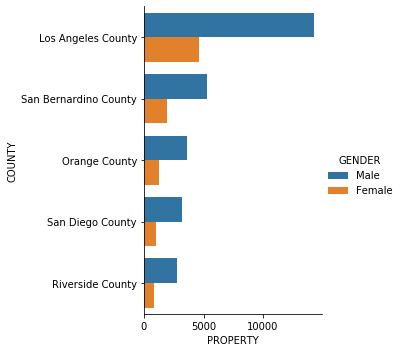

In [20]:
plt.figure(figsize = (40,40))
sns.catplot(x = 'PROPERTY', y = 'COUNTY', hue = 'GENDER', data = top_5, kind = 'bar')
plt.show()

#### Repeating similar code from above, I want to see the 5 counties with the lowest property arrests, compare gender numbers, and then graph the data

<Figure size 2880x2880 with 0 Axes>

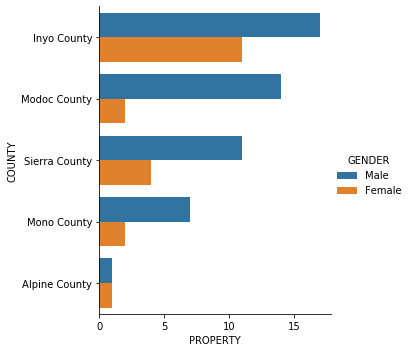

In [50]:
sc = groups.loc[groups['COUNTY'] == 'Sierra County']
Inyoc = groups.loc[groups['COUNTY'] == 'Inyo County']
modoc_c = groups.loc[groups['COUNTY'] == 'Modoc County']
mon_c = groups.loc[groups['COUNTY'] == 'Mono County']
ac = groups.loc[groups['COUNTY'] == 'Alpine County']
bot_5 = pd.concat([Inyoc, modoc_c, sc, mon_c, ac])
plt.figure(figsize = (40,40))
sns.catplot(x = 'PROPERTY', y = 'COUNTY', hue = 'GENDER', data = bot_5, kind = 'bar')
plt.show()

##### male avg property arrests and standard deviation.

In [39]:
male_crimes = df[df['GENDER']!= 'Female']
male_crimes = male_crimes[male_crimes['YEAR']==2018]
male_crimes = male_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes=male_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
male_avg = male_crimes['PROPERTY'].mean()
male_std = male_crimes['PROPERTY'].std()
print(male_avg)
print(male_std)

938.1724137931035
2074.332343552101


##### female avg property arrests and standard deviation.

In [38]:
female_crimes = df[df['GENDER']!= 'Male']
female_crimes = female_crimes[female_crimes['YEAR']==2018]
female_crimes = female_crimes.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
female_crimes=female_crimes.groupby(['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()
female_avg = female_crimes['PROPERTY'].mean()
female_std = female_crimes['PROPERTY'].std()
print(female_avg)
print(female_std)

319.7931034482759
684.6435045866249


##### To get the percent or property arrests for each county, we need tht population for each county. I retrieved my information from california-demographics.com. From there I retrieved the populations from each county. I do not need rank, so I'll drop it. Then merge previous tables so arrests are on one table.

In [56]:
"""webscrape populations from website"""
page = requests.get('https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container =  pd.read_html(page.content)
container = pd.DataFrame(container[0])
container.drop(columns = ['Rank'], inplace=True)

"""now to combine tables"""
combined_table = container.join(groups2.set_index('COUNTY'), on = 'County')
combined_table = combined_table.drop(58, axis=0)
combined_table = combined_table.astype({'Population':int, 'PROPERTY':int})
percentage = (combined_table['PROPERTY']/combined_table['Population'])*100
combined_table['percentage'] = percentage
combined_table = combined_table.groupby(['County']).sum().reset_index()
combined_table = combined_table.sort_values('percentage', ascending = False)
combined_table

,County,Population,YEAR,PROPERTY,percentage
45,Sierra County,2987,2018.0,15,0.502176
35,San Bernardino County,2171603,2018.0,7310,0.336618
53,Tulare County,465861,2018.0,1495,0.320911
14,Kern County,896764,2018.0,2607,0.290712
50,Sutter County,96807,2018.0,254,0.262378
52,Trinity County,12535,2018.0,31,0.247308
16,Lake County,64382,2018.0,159,0.246963
57,Yuba County,78041,2018.0,188,0.240899
22,Mendocino County,87606,2018.0,211,0.240851
6,Contra Costa County,1150215,2018.0,2740,0.238216


#### TOP 5 greatest percentage of property arrests 

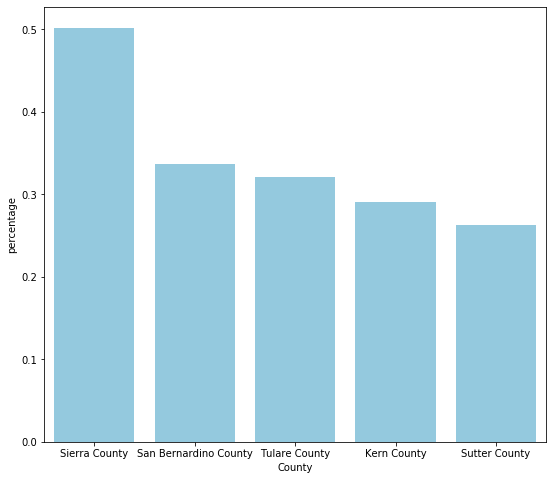

                   County  Population    YEAR  PROPERTY  percentage
45          Sierra County        2987  2018.0        15    0.502176
35  San Bernardino County     2171603  2018.0      7310    0.336618
53          Tulare County      465861  2018.0      1495    0.320911
14            Kern County      896764  2018.0      2607    0.290712
50          Sutter County       96807  2018.0       254    0.262378


In [60]:
sc = combined_table[combined_table['County'] == 'Sierra County']
sbc = combined_table[combined_table['County'] == 'San Bernardino County']
tc = combined_table[combined_table['County'] == 'Tulare County']
kc = combined_table[combined_table['County'] == 'Kern County']
sutter = combined_table[combined_table['County'] == 'Sutter County']
top_5 = pd.concat([sc, sbc, tc, kc, sutter])
plt.figure(figsize = (9,8))
sns.barplot(y = 'percentage', x ='County', data = top_5, color = 'skyblue')
plt.show()
print(top_5)

#### TOP 5 LOWEST percentage property arrests

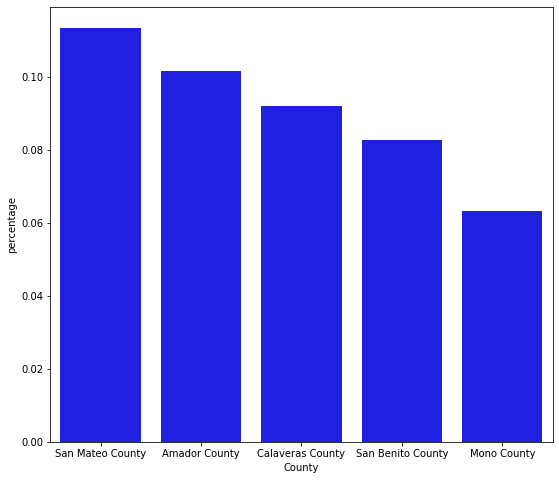

               County  Population    YEAR  PROPERTY  percentage
40   San Mateo County      769545  2018.0       874    0.113574
2       Amador County       39383  2018.0        40    0.101567
4    Calaveras County       45602  2018.0        42    0.092101
34  San Benito County       61537  2018.0        51    0.082877
25        Mono County       14250  2018.0         9    0.063158


In [59]:
smc = combined_table[combined_table['County'] == 'San Mateo County']
ac = combined_table[combined_table['County'] == 'Amador County']
cc = combined_table[combined_table['County'] == 'Calaveras County']
sbc = combined_table[combined_table['County'] == 'San Benito County']
mc = combined_table[combined_table['County'] == 'Mono County']
bot_5 = pd.concat([smc, ac, cc, sbc, mc])
plt.figure(figsize = (9,8))
sns.barplot(y = 'percentage', x ='County', data = bot_5, color = 'blue')
plt.show()
print(bot_5)